In [41]:
#!/usr/bin/python
import sys
import pickle
sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data
from matplotlib import pyplot as plt

'''
Questions
1. need more data other than final_project_dataset.pkl?
2. need to create a new data_dict with only the features I need? How to choose?
3. split the feature data into training and testing data? use provided code to split features and labels, and the CV to
split training and testing.
4. how to visualize

'''

'\nQuestions\n1. need more data other than final_project_dataset.pkl?\n2. need to create a new data_dict with only the features I need?\n3. split the feature data into training and testing data? use provided code to split features and labels, and the CV to\nsplit training and testing.\n4. how to visualize\n\n'

In [42]:
### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
features_list = ['poi','salary','to_messages','deferral_payments','total_payments','exercised_stock_options',
                'bonus', 'restricted_stock', 'shared_receipt_with_poi', 'restricted_stock_deferred', 
                 'total_stock_value', 'expenses', 'loan_advances', 'from_messages', 'other', 'from_this_person_to_poi',
                 'poi', 'director_fees', 'deferred_income', 'long_term_incentive', 'email_address', 
                 'from_poi_to_this_person'] # You will need to use more features

### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

    
# create a dataset with selected features only.
featured_data = {}
for i in data_dict:
    featured_data[i] = {}
    for j in data_dict[i]:
        if j in features_list:
            featured_data[i][j] = data_dict [i][j]
print featured_data

{'METTS MARK': {'salary': 365788, 'to_messages': 807, 'deferral_payments': 'NaN', 'total_payments': 1061827, 'loan_advances': 'NaN', 'bonus': 600000, 'email_address': 'mark.metts@enron.com', 'restricted_stock_deferred': 'NaN', 'total_stock_value': 585062, 'shared_receipt_with_poi': 702, 'long_term_incentive': 'NaN', 'exercised_stock_options': 'NaN', 'from_messages': 29, 'other': 1740, 'from_poi_to_this_person': 38, 'from_this_person_to_poi': 1, 'poi': False, 'deferred_income': 'NaN', 'expenses': 94299, 'restricted_stock': 585062, 'director_fees': 'NaN'}, 'BAXTER JOHN C': {'salary': 267102, 'to_messages': 'NaN', 'deferral_payments': 1295738, 'total_payments': 5634343, 'loan_advances': 'NaN', 'bonus': 1200000, 'email_address': 'NaN', 'restricted_stock_deferred': 'NaN', 'total_stock_value': 10623258, 'shared_receipt_with_poi': 'NaN', 'long_term_incentive': 1586055, 'exercised_stock_options': 6680544, 'from_messages': 'NaN', 'other': 2660303, 'from_poi_to_this_person': 'NaN', 'from_this_pe

In [25]:
### Data exploration
# number of data points
# propotion of poi
pois = 0.0
for i in data_dict:
    if data_dict[i]['poi'] == True:
        pois += 1
print 'There are {} POI and {} person in total. The propotion is {}'.format(int(pois), len(data_dict),pois / len(data_dict))

There are 18 POI and 146 person in total. The propotion is 0.123287671233


[1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 0.0, 0.0, 0.0, 1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 0.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 8.0, 3.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

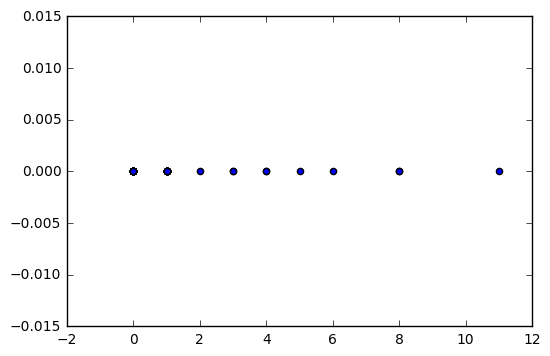

In [50]:
### Task 2: Remove outliers
from_poi_ratio = 0.0
to_poi_ratio = 0.0
x = []
y = []
for name in featured_data:
    if featured_data[name]['from_poi_to_this_person'] != 'NaN' and featured_data[name]['from_messages'] != 'NaN':
        from_poi_ratio = float(featured_data[name]['from_poi_to_this_person'] / featured_data[name]['from_messages'])
    else:
        from_poi_ratio = 0.0
    x.append(from_poi_ratio)
    
    if featured_data[name]['from_this_person_to_poi'] != 'NaN' and featured_data[name]['to_messages'] != 'NaN':
        from_poi_ratio = float(featured_data[name]['from_this_person_to_poi'] / featured_data[name]['to_messages'])
    else:
        from_poi_ratio = 0.0
    y.append(from_poi_ratio)
        
print x
print y
plt.scatter(x,y)
plt.show()

In [7]:
### Task 3: Create new feature(s)

In [9]:
### Store to my_dataset for easy export below.
my_dataset = data_dict

In [10]:
### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

In [ ]:
### Task 4: Try a varity of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html

# Provided to give you a starting point. Try a variety of classifiers.
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()


In [ ]:
### Task 5: Tune your classifier to achieve better than .3 precision and recall 
### using our testing script. Check the tester.py script in the final project
### folder for details on the evaluation method, especially the test_classifier
### function. Because of the small size of the dataset, the script uses
### stratified shuffle split cross validation. For more info: 
### http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html

# Example starting point. Try investigating other evaluation techniques!
from sklearn.cross_validation import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)


In [ ]:
### Task 6: Dump your classifier, dataset, and features_list so anyone can
### check your results. You do not need to change anything below, but make sure
### that the version of poi_id.py that you submit can be run on its own and
### generates the necessary .pkl files for validating your results.

dump_classifier_and_data(clf, my_dataset, features_list)